In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
cliff=[[-1 for j in range(12)] for i in range(4)]
for i in range(1,11):
    cliff[3][i]=-100 #悬崖
    
cliff[3][11]=0
start=[3,0]
end=[3,11]


In [3]:
eps=0.1
gamma=1
episodes=500
d=[[0,1],[0,-1],[1,0],[-1,0]]
alpha=0.5
iterations=1000

In [4]:
reward_Sarsa=[0 for i in range(episodes)]
reward_Q=[0 for i in range(episodes)]
x=[i for i in range(1,501)]

In [5]:
def getaction_Sarsa(S,eps):
    p=random.random()
    if(p<eps):
        a=random.randint(0,3)
        return a
    else:
        a=[]
        mx=-1e9
        for i in range(4):
            if mx<Q_Sarsa[S[0]][S[1]][i]:
                mx=Q_Sarsa[S[0]][S[1]][i]
                
        for i in range(4):
            if mx==Q_Sarsa[S[0]][S[1]][i]:
                a.append(i)
        return random.choice(a)

In [6]:
def episode_Sarsa(eps):
    state=start
    A=getaction_Sarsa(state,eps)
    all_reward=0
    while True:
        newx=state[0]+d[A][0]
        newy=state[1]+d[A][1]
        if newx<0 or newx>3:
            newx=state[0]
        if newy<0 or newy>11:
            newy=state[1]
        reward=cliff[newx][newy]
        all_reward+=reward
        newA=getaction_Sarsa([newx,newy],eps)
        Q_Sarsa[state[0]][state[1]][A]+=alpha*(reward+gamma*Q_Sarsa[newx][newy][newA]-Q_Sarsa[state[0]][state[1]][A])
        if cliff[newx][newy]==-100:
            break
        if [newx,newy]==end:
            break
        state=[newx,newy]
        A=newA
    return all_reward

In [7]:
def getaction_Q(S,eps):
    p=random.random()
    if(p<eps):
        a=random.randint(0,3)
        return a
    else:
        a=[]
        mx=-1e9
        for i in range(4):
            if mx<Q_Q[S[0]][S[1]][i]:
                mx=Q_Q[S[0]][S[1]][i]
                
        for i in range(4):
            if mx==Q_Q[S[0]][S[1]][i]:
                a.append(i)
        return random.choice(a)

In [8]:
def episode_Q(eps):
    state=start
    all_reward=0
    while True:
        A=getaction_Q(state,eps)
        newx=state[0]+d[A][0]
        newy=state[1]+d[A][1]
        if newx<0 or newx>3:
            newx=state[0]
        if newy<0 or newy>11:
            newy=state[1]
        reward=cliff[newx][newy]
        all_reward+=reward
        Q_Q[state[0]][state[1]][A]+=alpha*(reward+gamma*max(Q_Q[newx][newy])-Q_Q[state[0]][state[1]][A])
        if cliff[newx][newy]==-100:
            break
        if [newx,newy]==end:
            break
        state=[newx,newy]
    return all_reward

In [9]:
for iter in range(iterations):
    A_Sarsa=[[0 for j in range(12)] for i in range(4)]
    Q_Sarsa=[[[0 for k in range(4)] for j in range(12)] for i in range(4)]
    A_Q=[[0 for j in range(12)] for i in range(4)]
    Q_Q=[[[0 for k in range(4)] for j in range(12)] for i in range(4)]
    for epi in range(episodes):
        tmp_reward_Q=episode_Q(eps)
        tmp_reward_Sarsa=episode_Sarsa(eps)
        reward_Q[epi]+=tmp_reward_Q
        reward_Sarsa[epi]+=tmp_reward_Sarsa

for i in range(episodes):
    reward_Q[i]/=iterations
    reward_Sarsa[i]/=iterations

Text(0, 0.5, 'reward')

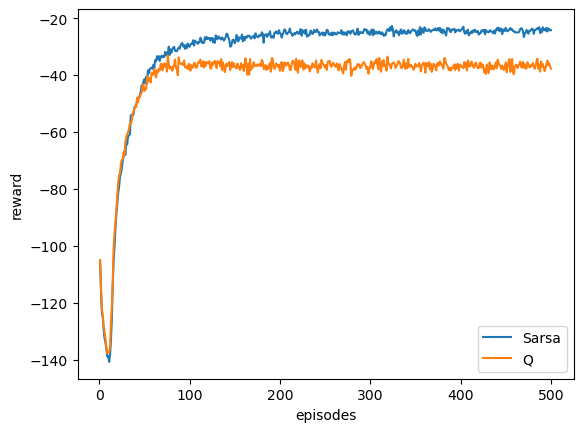

In [10]:
plt.plot(x,reward_Sarsa,label='Sarsa')
plt.plot(x,reward_Q,label='Q')
plt.legend()
plt.xlabel("episodes")
plt.ylabel("reward")
plt.title("fixed ε")

In [12]:
eps_2=[0.1,0.05,0.02,0.01,0]
for iter in range(iterations):
    A_Sarsa=[[0 for j in range(12)] for i in range(4)]
    Q_Sarsa=[[[0 for k in range(4)] for j in range(12)] for i in range(4)]
    A_Q=[[0 for j in range(12)] for i in range(4)]
    Q_Q=[[[0 for k in range(4)] for j in range(12)] for i in range(4)]
    for epi in range(episodes):
        tmp_reward_Q=episode_Q(eps_2[epi//100])
        tmp_reward_Sarsa=episode_Sarsa(eps_2[epi//100])
        reward_Q[epi]+=tmp_reward_Q
        reward_Sarsa[epi]+=tmp_reward_Sarsa

for i in range(episodes):
    reward_Q[i]/=iterations
    reward_Sarsa[i]/=iterations

Text(0.5, 1.0, 'decreasing ε')

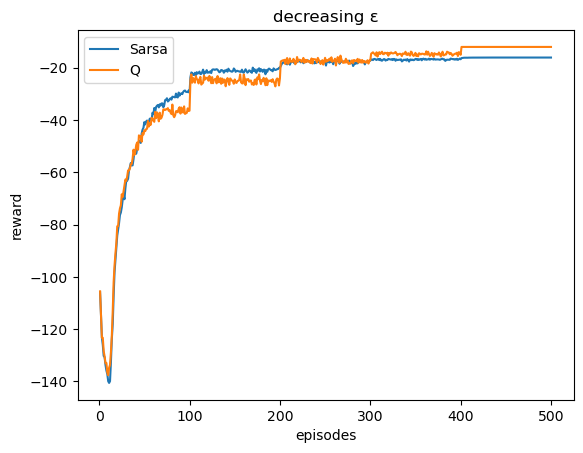

In [13]:
plt.plot(x,reward_Sarsa,label='Sarsa')
plt.plot(x,reward_Q,label='Q')
plt.legend()
plt.xlabel("episodes")
plt.ylabel("reward")
plt.title("decreasing ε")